Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[[45  0  0]
 [ 2 41  1]
 [ 0  0 36]]


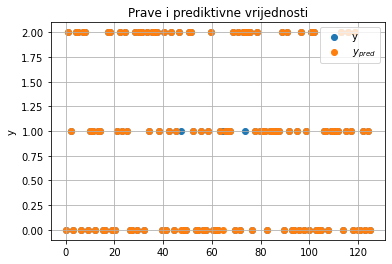

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.metrics
from google.colab import drive

drive.mount('/content/drive')

# ucitavanje podataka
data = pd.read_csv('/content/drive/MyDrive/multiclass_data.csv', header=None)
data = data.values

# podjela na testirajuci  i obucavajuci skup
rows = data.shape[0]
ratio = 0.3
indices = np.random.permutation(rows)
ind_train = indices[0:round(ratio*rows)]
ind_test = indices[round(ratio*rows)::]
data_train = data[ind_train,:]
data_test = data[ind_test,:]

# racunanje parametara raspodjele
mean = np.zeros([5,3])
var = np.zeros([5,3])
fi = np.zeros(3)
for i in range(0,3):
  mean[:,i] = np.mean(data_train[data_train[:,5]==i],axis=0)[0:5]
  var[:,i] = np.var(data_train[data_train[:,5]==i],axis=0)[0:5]
  fi[i] = len(data_train[data_train[:,5]==i])/len(data_train)

# klasifikacija
y_pred = np.zeros(len(data_test))
for i in range(0,len(data_test)):
  p = np.copy(fi)
  for k in range(0,5):
    p = p * 1/(2*np.pi*var[k,:])**0.5*np.exp(-0.5*((data_test[i,k]-mean[k,:])**2/var[k,:]))
  p = p/sum(p)
  y_pred[i] = np.argmax(p)

print(sklearn.metrics.confusion_matrix(data_test[:,5],y_pred))

x_osa = np.linspace(0,len(y_pred),len(y_pred))
plt.scatter(x_osa,data_test[:,5])
plt.scatter(x_osa,y_pred)
plt.title('Prave i prediktivne vrijednosti')
plt.ylabel('y')
plt.legend(['y','$y_{pred}$'])
plt.grid()

In [64]:
100-3/len(data_train)*100

94.33962264150944